**Лабораторная работа №2**

In [168]:
import math
import numpy as np
import matplotlib.pyplot as plt

**Задание 1. Построение ковариационной функции, семивариограммы и спектральной плотности.**

In [169]:
def R_1(t, D, a):
    return D * math.exp(- a * abs(t))
def R_2(t, D, a, b):
    return D * math.exp(- a * abs(t)) * (math.cos(b * t) - (a / b) * math.sin(b * abs(t)))
def Semivar_1(t, D, a):
    return R_1(0, D, a) - R_1(t, D, a)
def Semivar_2(t, D, a, b):
    return R_2(0, D, a, b) - R_2(t, D, a, b)
def S_1(l, D, a):
    return (D * a) / (math.pi * ((a * a) + (l * l)))
def S_2(l, D, a, b):
    return (2 * D * a * l * l) / (math.pi * (math.pow((l * l) + (a * a) + (b * b), 2) - (4 * a * a * b * b)))    

Задание параметров

In [170]:
length = 80
t = np.arange(0, length)
l  = np.arange(0, 3, 3 / length)
param_n = 3
a = [0.1, 0.5, 1]
D = [0.8, 2, 3]
b = [0.1, 0.2, 0.3]

1\) 1-ая ковариационная функция из таблицы.

График ковариационной функции.

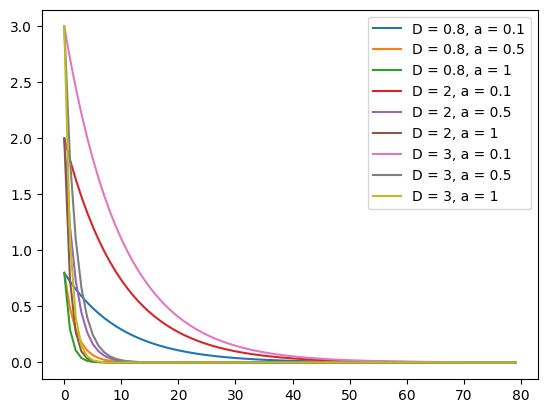

In [171]:

r_1 = [0.] * length
for d_x in D:
        for a_x in a:
            for i in range(length):
                r_1[i] = R_1(i, d_x, a_x)
            
            plt.plot(t, r_1, label = f'D = {d_x}, a = {a_x}')

plt.legend()
plt.show()



График семивариограммы.

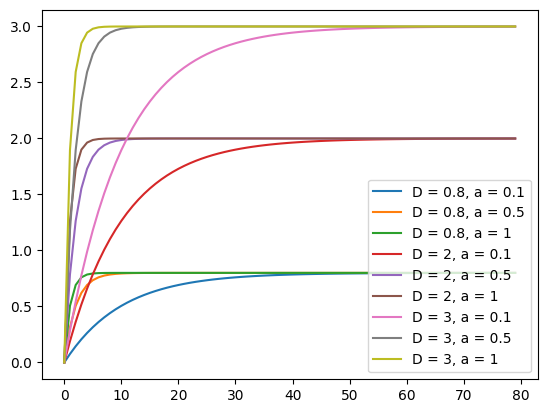

In [172]:
semivar_1 = [0.] * length
for d_x in D:
        for a_x in a:
            for i in range(length):
                semivar_1[i] = Semivar_1(i, d_x, a_x)
            
            plt.plot(t, semivar_1, label = f'D = {d_x}, a = {a_x}')

plt.legend()
plt.show()

График спектральной плотности.

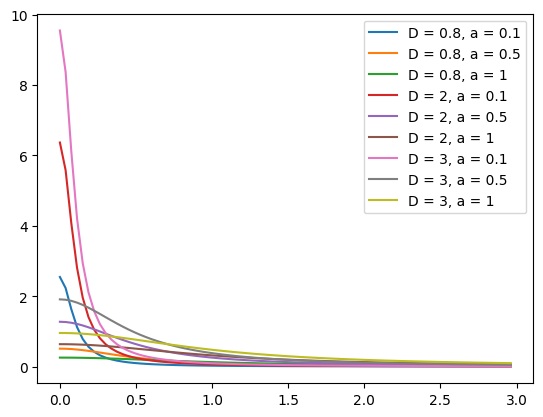

In [173]:
s_1 = [0.] * length
for d_x in D:
        for a_x in a:
            for i in range(length):
                s_1[i] = S_1(l[i], d_x, a_x)

            plt.plot(l, s_1, label = f'D = {d_x}, a = {a_x}')
            
plt.legend()
plt.show()

2\) 5-ая ковариационная функция из таблицы.

График ковариационной функции.

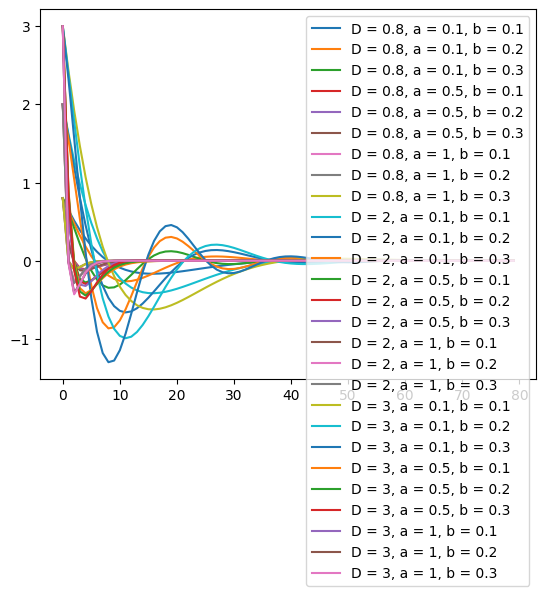

In [174]:
r_2 = [0.] * length
for d_x in D:
        for a_x in a:
            for b_x in b:
                for i in range(length):
                    r_2[i] = R_2(i, d_x, a_x, b_x)
            
                plt.plot(t, r_2, label = f'D = {d_x}, a = {a_x}, b = {b_x}')
                
plt.legend()
plt.show()

График семивариограммы.

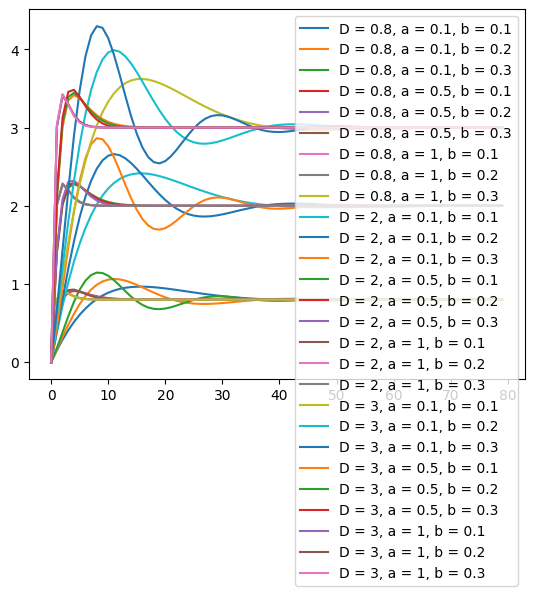

In [175]:
semivar_2 = [0.] * length
for d_x in D:
        for a_x in a:
            for b_x in b:
                for i in range(length):
                    semivar_2[i] = Semivar_2(i, d_x, a_x, b_x)
            
                plt.plot(t, semivar_2, label = f'D = {d_x}, a = {a_x}, b = {b_x}')
                
plt.legend()
plt.show()

График спектральной плотности.

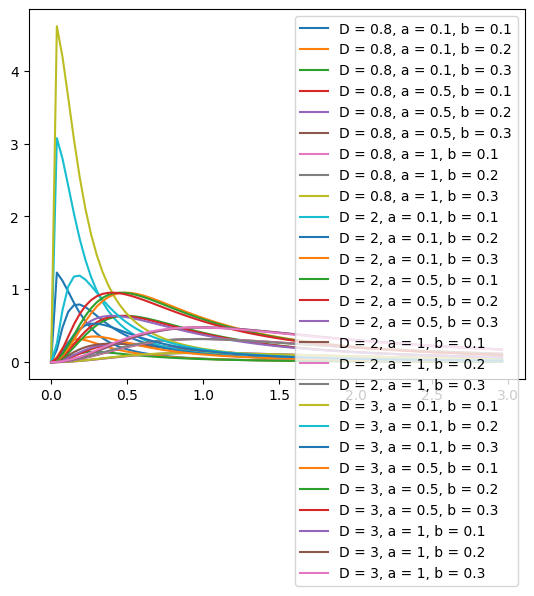

In [176]:
s_2 = [0.] * length
for d_x in D:
        for a_x in a:
            for b_x in b:
                for i in range(length):
                    s_2[i] = S_2(l[i], d_x, a_x, b_x)

                plt.plot(l, s_2, label = f'D = {d_x}, a = {a_x}, b = {b_x}')
            
plt.legend()
plt.show()

**Задание 2. Время корреляции.**

In [177]:
def t0_1(a):
    return [1 / a, 1 / a, 1 / (2 * a)]
def t0_2(a, b):
    return [0, math.nan, 1 / (4 * a)]

1-ая ковариационная функция.

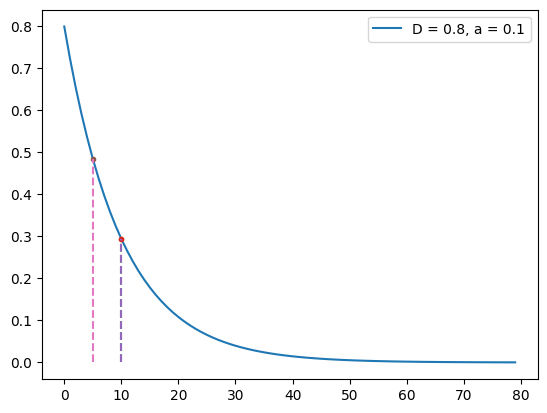

In [178]:
for i in range(length):
    r_1[i] = R_1(i, D[0], a[0])

plt.plot(t, r_1, label = f'D = {D[0]}, a = {a[0]}')

for t0 in t0_1(a[0]):
    plt.plot(t0, R_1(t0, D[0], a[0]), '.')
    plt.plot((t0, t0), (0, R_1(t0, D[0], a[0])), '--')

plt.legend()
plt.show()

5-ая ковариационная функция.

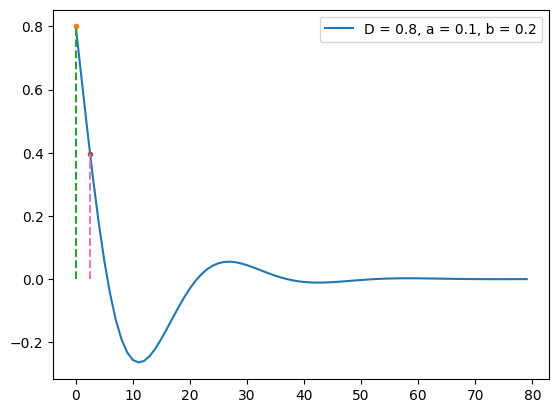

In [179]:
for i in range(length):
    r_2[i] = R_2(i, D[0], a[0], b[1])

plt.plot(t, r_2, label = f'D = {D[0]}, a = {a[0]}, b = {b[1]}')

for t0 in t0_2(a[0], b[0]):
    plt.plot(t0, R_2(t0, D[0], a[0], b[1]), '.')
    plt.plot((t0, t0), (0, R_2(t0, D[0], a[0], b[1])), '--')

plt.legend()
plt.show()